In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [21]:
dataset= pd.read_csv('diabetes.csv')

In [22]:
dataset_copy= dataset.copy(deep=True)

In [23]:
dataset_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = dataset_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

dataset_copy.isnull().sum()

Pregnancies                   0
Glucose                      13
BloodPressure                90
SkinThickness               573
Insulin                     956
BMI                          28
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [24]:
dataset_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138.0,62.0,35.0,NaN,33.6,0.127,47,1
1,0,84.0,82.0,31.0,125.0,38.2,0.233,23,0
2,0,145.0,NaN,NaN,NaN,44.2,0.630,31,1
3,0,135.0,68.0,42.0,250.0,42.3,0.365,24,1
4,1,139.0,62.0,41.0,480.0,40.7,0.536,21,0


In [25]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(dataset_copy.iloc[:, 1:-3])
dataset_copy.iloc[:, 1:-3] = imputer.transform(dataset_copy.iloc[:, 1:-3])

In [26]:
print(dataset_copy)

      Pregnancies  Glucose  ...  Age  Outcome
0               2    138.0  ...   47        1
1               0     84.0  ...   23        0
2               0    145.0  ...   31        1
3               0    135.0  ...   24        1
4               1    139.0  ...   21        0
...           ...      ...  ...  ...      ...
1995            2     75.0  ...   33        0
1996            8    179.0  ...   36        1
1997            6     85.0  ...   42        0
1998            0    129.0  ...   26        1
1999            2     81.0  ...   25        0

[2000 rows x 9 columns]


In [27]:
dataset_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138.0,62.000000,35.000000,153.743295,33.6,0.127,47,1
1,0,84.0,82.000000,31.000000,125.000000,38.2,0.233,23,0
2,0,145.0,72.403665,29.341275,153.743295,44.2,0.630,31,1
3,0,135.0,68.000000,42.000000,250.000000,42.3,0.365,24,1
4,1,139.0,62.000000,41.000000,480.000000,40.7,0.536,21,0


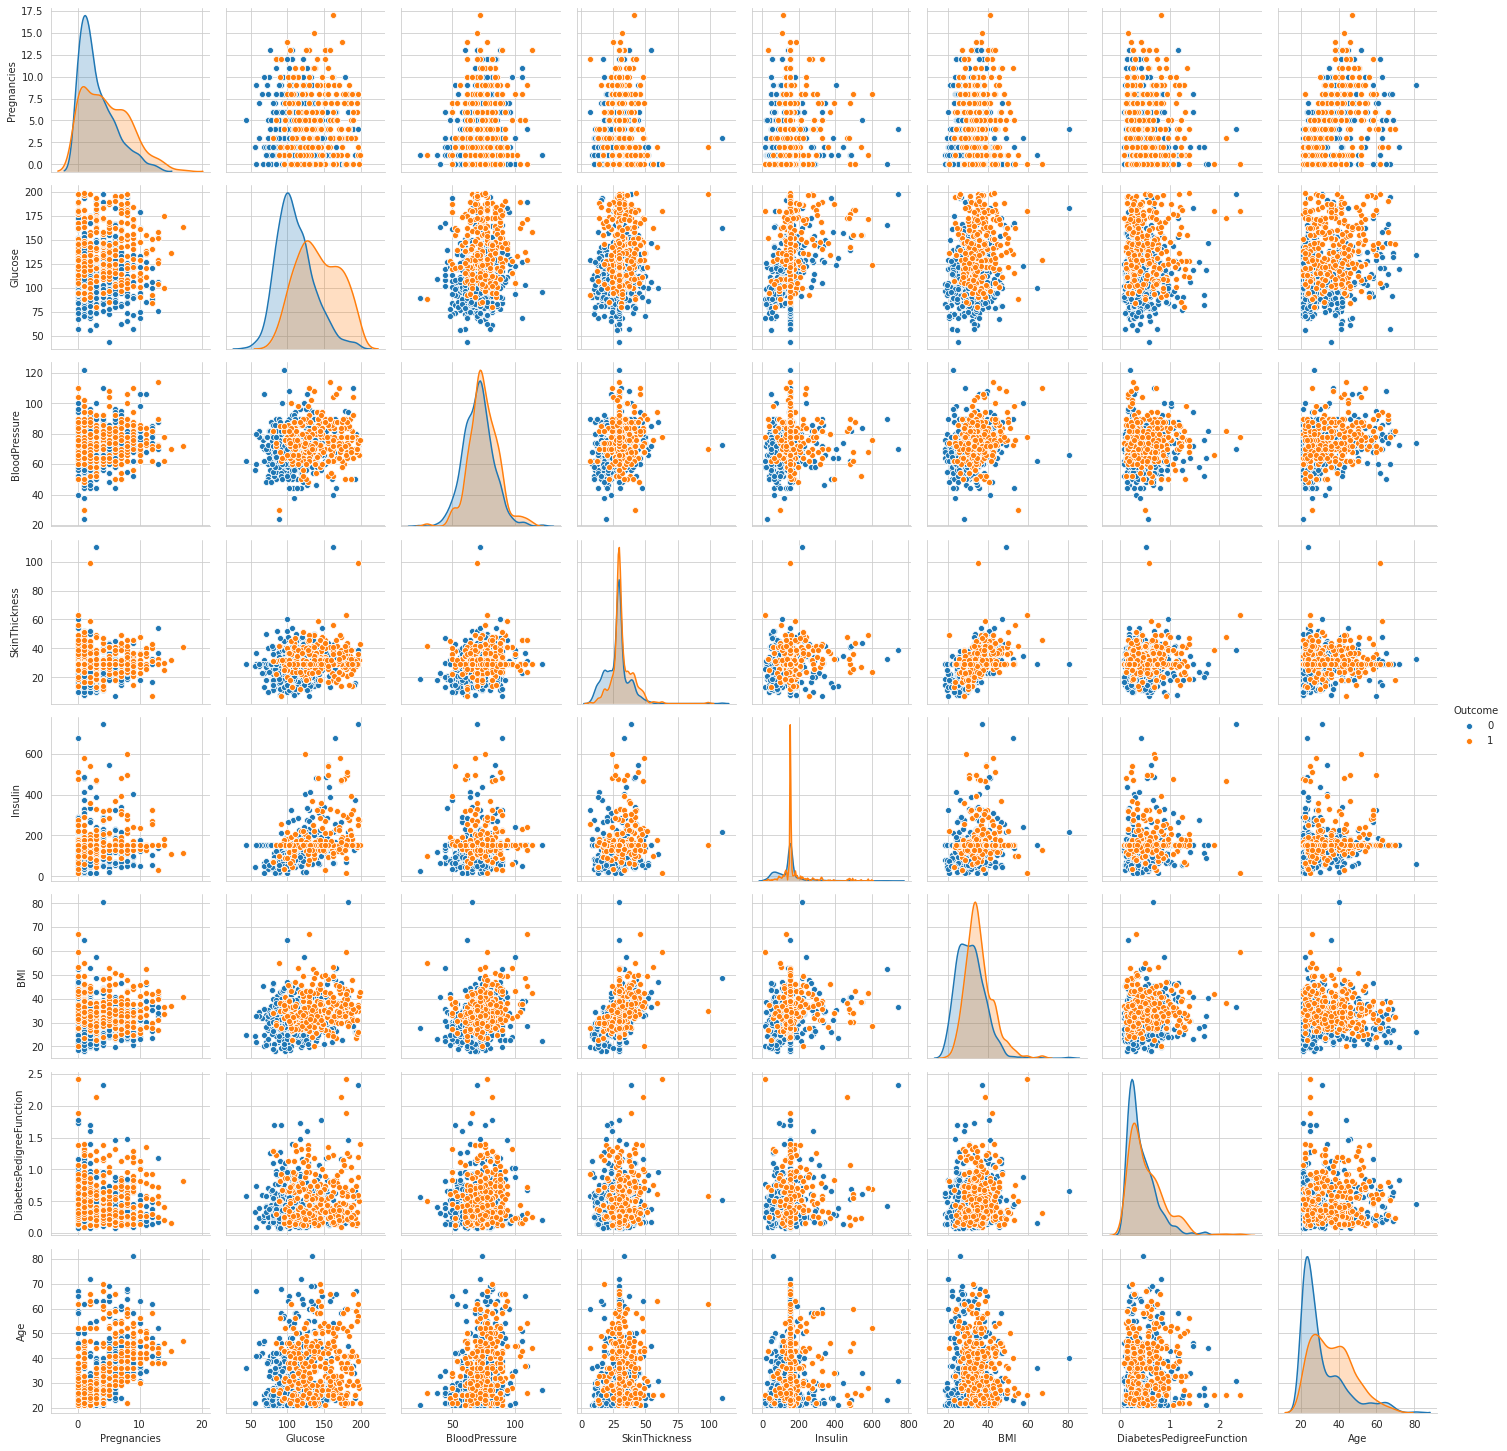

In [28]:
sns.set_style("whitegrid")          
sns.pairplot(dataset_copy, hue='Outcome')

In [29]:
x= dataset_copy.iloc[:, : -1].values
y= dataset_copy.iloc[:, -1].values

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [31]:
print(x_train)


[[2.00000000e+00 1.38000000e+02 6.20000000e+01 ... 3.36000000e+01
  1.27000000e-01 4.70000000e+01]
 [1.00000000e+00 1.39000000e+02 4.60000000e+01 ... 2.87000000e+01
  6.54000000e-01 2.20000000e+01]
 [4.00000000e+00 1.29000000e+02 6.00000000e+01 ... 2.75000000e+01
  5.27000000e-01 3.10000000e+01]
 ...
 [8.00000000e+00 1.55000000e+02 6.20000000e+01 ... 3.40000000e+01
  5.43000000e-01 4.60000000e+01]
 [4.00000000e+00 1.71000000e+02 7.20000000e+01 ... 4.36000000e+01
  4.79000000e-01 2.60000000e+01]
 [4.00000000e+00 1.83000000e+02 7.24036649e+01 ... 2.84000000e+01
  2.12000000e-01 3.60000000e+01]]


In [32]:
print(x_test)


[[  8.     91.     82.    ...  35.6     0.587  68.   ]
 [  3.    174.     58.    ...  32.9     0.593  36.   ]
 [  0.    113.     76.    ...  33.3     0.278  23.   ]
 ...
 [  1.    119.     54.    ...  22.3     0.205  24.   ]
 [  0.    138.     60.    ...  34.6     0.534  21.   ]
 [  2.    174.     88.    ...  44.5     0.646  24.   ]]


In [33]:
print(y_train)


[1 0 0 ... 1 1 1]


In [34]:
print(y_test)


[0 1 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1
 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0 1 0
 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0
 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0 0 1 1
 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0
 0 0 0 1 1 1 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 1 0 1 0 1 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0
 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1]


In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [36]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 150, criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [37]:
y_pred = classifier.predict(x_test)

In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[263   6]
 [  2 129]]


0.98